<a href="https://colab.research.google.com/github/Aadhi7310/project/blob/main/sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
stime = np.zeros((40, 40))
prate = np.zeros((40, 4))
orderdue = np.zeros(40)
releasetime = np.zeros(40)

def setuptime(stime):
    with open("setuptime.txt", "r") as f:
        for i in range(40):
            stime[i, :] = list(map(float, f.readline().split()))

def processingrate(prate):
    with open("rate.txt", "r") as f:
        for i in range(40):
            prate[i, :] = list(map(float, f.readline().split()))

def order(releasetime, orderdue):
    with open("order.txt", "r") as f:
        for i in range(40):
            releasetime[i], orderdue[i] = map(float, f.readline().split())

def Makeupspan1(X, TTT, lateness):
    xx = np.zeros(60)
    sum = 0

    for k1 in range(60):
        xx[k1] = X[k1]

    ordern = np.zeros(40, dtype=int)
    releasetime = np.zeros(40)
    orderdue = np.zeros(40)
    stime = np.zeros((40, 40))
    prate = np.zeros((40, 4))
    TTT = 0
    lateness = 0.0
    T = np.zeros(40)

    order(releasetime, orderdue)
    setuptime(stime)
    processingrate(prate)

    TT = np.zeros(4)
    late = np.zeros(4)
    C = np.zeros(4)

    for k1 in range(4):
        late[k1] = 0
        C[k1] = 0

    TT[0] = 0
    TT[1] = 3
    TT[2] = 2
    TT[3] = 3

    for k1 in range(40):
        T[k1] = 0

    for j1 in range(60):
        for i1 in range(40):
            k1 = int((j1 - 1) / 15) + 1
            if xx[j1] == i1:
                T[i1] = prate[i1, k1 - 1]
                TS = 0
                if C[k1 - 1] > 0:
                    if j1 > ((k1 - 1) * 15 + 1):
                        TS = stime[C[k1 - 1], i1]
                C[k1 - 1] = i1

                if TT[k1 - 1] < releasetime[i1]:
                    TT[k1 - 1] = releasetime[i1]

                TT[k1 - 1] += T[i1] + TS

                if (orderdue[i1] - TT[k1 - 1]) < 0:
                    late[k1 - 1] += (TT[k1 - 1] - orderdue[i1])
                    sum += 1

    TTT = 0
    lateness = 0.0
    for i in range(4):
        if TT[i] > TTT:
            TTT = TT[i]
        lateness += late[i]

    if lateness > 0:
        lateness = sum + lateness * 0.0001

    p = np.zeros(40, dtype=int)

    for i in range(60):
        if xx[i] > 0:
            p[xx[i]] += 1

    for i in range(40):
        if p[i] != 1:
            print(i, p[i], "sam")

def EditDistance(X, D):
    D1 = np.zeros((16, 16), dtype=int)
    D2 = np.zeros((16, 16), dtype=int)
    D3 = np.zeros((16, 16), dtype=int)
    D4 = np.zeros((16, 16), dtype=int)
    orderx = np.zeros((4, 15), dtype=int)

    for i in range(16):
        D1[i, 0] = i
        D1[0, i] = i
        D2[i, 0] = i
        D2[0, i] = i
        D3[i, 0] = i
        D3[0, i] = i
        D4[i, 0] = i
        D4[0, i] = i

    with open("initial.txt", "r") as f:
        for i in range(15):
            orderx[:, i] = list(map(int, f.readline().split()))

    for i in range(2, 16):
        for j in range(2, 16):
            if X[i - 1] != orderx[0, j - 1]:
                cost = 1
            D1[i, j] = min(D1[i - 1, j] + 1, D1[i, j - 1] + 1, D1[i - 1, j - 1] + cost)
            cost = 0

    for i in range(2, 16):
        for j in range(2, 16):
            if X[i + 15 - 1] != orderx[1, j - 1]:
                cost = 1
            D2[i, j] = min(D2[i - 1, j] + 1, D2[i, j - 1] + 1, D2[i - 1, j - 1] + cost)
            cost = 0

    for i in range(2, 16):
        for j in range(2, 16):
            if X[i + 30 - 1] != orderx[2, j - 1]:
                cost = 1
            D3[i, j] = min(D3[i - 1, j] + 1, D3[i, j - 1] + 1, D3[i - 1, j - 1] + cost)
            cost = 0

    for i in range(2, 16):
        for j in range(2, 16):
            if X[i + 45 - 1] != orderx[3, j - 1]:
                cost = 1
            D4[i, j] = min(D4[i - 1, j] + 1, D4[i, j - 1] + 1, D4[i - 1, j - 1] + cost)
            cost = 0

    D = D1[15, 15] + D2[15, 15] + D3[15, 15] + D4[15, 15]

    return

# New Section

In [25]:
setuptime(stime)
processingrate(prate)
order(releasetime, orderdue)
print(orderdue)
print(releasetime,orderdue)
print(stime)

[15. 30. 22. 25. 20. 30. 21. 26. 30. 29. 30. 21. 30. 25. 24. 30. 30. 30.
 13. 19. 30. 20. 12. 30. 17. 20. 11. 30. 25. 26. 22. 18. 15. 10. 10. 14.
 24. 16. 22. 23.]
[0.  5.  0.  6.  0.  0.  3.  0.  0.  0.5 0.  0.  1.  0.  4.  0.  3.  0.
 5.  0.  0.  2.  0.  1.  0.  6.  0.  2.  0.  0.  0.  1.  0.  1.5 0.  0.
 0.  0.  0.  1. ] [15. 30. 22. 25. 20. 30. 21. 26. 30. 29. 30. 21. 30. 25. 24. 30. 30. 30.
 13. 19. 30. 20. 12. 30. 17. 20. 11. 30. 25. 26. 22. 18. 15. 10. 10. 14.
 24. 16. 22. 23.]
[[100.      0.175   0.18  ...   0.65    1.1   100.   ]
 [100.    100.      1.1   ... 100.      0.3   100.   ]
 [  1.      0.15  100.    ... 100.      1.5   100.   ]
 ...
 [  0.4     0.5     1.1   ... 100.      0.6     0.45 ]
 [100.      0.7     1.1   ...   0.45  100.    100.   ]
 [100.    100.    100.    ... 100.    100.    100.   ]]


In [26]:
import random

def generate_initial_solution(ipopsize, lchrom):
    initial_population = []

    for i in range(ipopsize):
        # Generate a random chromosome of length lchrom (binary sequence)
        chromosome = [random.randint(0, 1) for _ in range(lchrom)]
        initial_population.append(chromosome)

    return initial_population

# Example usage:
ipopsize = 50   # Number of chromosomes (population size)
lchrom = 60    # Length of each chromosome (number of genes)

# Generate the initial population (solution)
initial_population = generate_initial_solution(ipopsize, lchrom)

# Display the generated initial population
for idx, chrom in enumerate(initial_population):
    print(f"Chromosome {idx+1}: {chrom}")

Chromosome 1: [1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1]
Chromosome 2: [1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0]
Chromosome 3: [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0]
Chromosome 4: [1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0]
Chromosome 5: [0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0]
Chromosome 6: [1, 1, 0, 1

In [27]:
def generate_initial_sol(ipopsize, lchrom, processing_times):
    initial_population = []

    for _ in range(ipopsize):
        chromosome = []

        for order in range(lchrom // 2):
            valid_machines = [machine for machine in range(4) if processing_times[order][machine] != 100]

            # Select a random valid machine for this order if available
            if valid_machines:
                machine = random.choice(valid_machines)

                # Encode machine as two bits (00, 01, 10, 11)
                chromosome.append((machine >> 1) & 1)  # Most significant bit
                chromosome.append(machine & 1)         # Least significant bit
            else:
                # If no valid machine exists (shouldn't happen in well-formed data), default to [0, 0]
                chromosome.extend([0, 0])

        initial_population.append(chromosome)

    return initial_population
ipopsize = 50   # Number of chromosomes (population size)
lchrom = 60    # Length of each chromosome (number of genes)

# Generate the initial population (solution)
initial_population = generate_initial_sol(ipopsize, lchrom,prate)

# Display the generated initial population
for idx, chrom in enumerate(initial_population):
    print(f"Chromosome {idx+1}: {chrom}")

Chromosome 1: [1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
Chromosome 2: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
Chromosome 3: [0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
Chromosome 4: [1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1]
Chromosome 5: [1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1]
Chromosome 6: [0, 0, 1, 1

In [28]:
stime

array([[100.   ,   0.175,   0.18 , ...,   0.65 ,   1.1  , 100.   ],
       [100.   , 100.   ,   1.1  , ..., 100.   ,   0.3  , 100.   ],
       [  1.   ,   0.15 , 100.   , ..., 100.   ,   1.5  , 100.   ],
       ...,
       [  0.4  ,   0.5  ,   1.1  , ..., 100.   ,   0.6  ,   0.45 ],
       [100.   ,   0.7  ,   1.1  , ...,   0.45 , 100.   , 100.   ],
       [100.   , 100.   , 100.   , ..., 100.   , 100.   , 100.   ]])

In [29]:
def calculate_max_machine_time(chromosome, setup_time, processing_times,orderdue):
    machine_times = [0, 0, 0, 0]  # Four machines, indexed 0 to 3
    order_completion_times = [0] * len(orderdue)  # Completion time for each order
    total_lateness = 0
    schedule = []

    # Decode chromosome to sequence of orders with machines
    for i in range(0, len(chromosome), 2):
        order = i // 2  # Each order corresponds to 2 bits in chromosome
        machine_code = chromosome[i] * 2 + chromosome[i+1]
        machine = machine_code  # Machine is from 0 to 3 for indexing
        schedule.append((order, machine))

    # Calculate processing and setup time per machine
    for i in range(len(schedule)):
        order, machine = schedule[i]

        # Add processing time for the order on the assigned machine
        machine_times[machine] += processing_times[order][machine]

        # Update order completion time on this machine
        order_completion_times[order] = machine_times[machine]

        # Add setup time if not the last order and next order is on the same machine
        if i < len(schedule) - 1:
            next_order, next_machine = schedule[i + 1]
            if machine == next_machine:  # Only add setup time if the next order is on the same machine
                machine_times[machine] += setup_time[order][next_order]

    # Calculate lateness for each order
    for order in range(len(orderdue)):
        lateness = max(0, order_completion_times[order] - orderdue[order])
        total_lateness += lateness

    # Calculate the maximum time taken by any single machine
    max_time = max(machine_times)

    return [max_time,total_lateness]

# Calculate and print total time for each chromosome

In [30]:
timeconst = []
for i in range(50):
  timeconst.append(calculate_max_machine_time(initial_population[i],stime,prate,orderdue))
timeconst

[[338.104, 2306.298],
 [133.239, 1414.464],
 [239.8, 1989.453],
 [348.123, 2261.1609999999996],
 [238.565, 1126.296],
 [139.184, 1096.904],
 [144.04600000000002, 917.688],
 [236.217, 1845.221],
 [332.17699999999996, 2065.936],
 [238.19500000000002, 1647.686],
 [237.797, 1694.2069999999999],
 [343.53799999999995, 2202.6719999999996],
 [247.90099999999998, 1580.88],
 [233.65900000000002, 2028.8090000000002],
 [158.321, 714.5060000000001],
 [347.033, 2616.879],
 [342.095, 2198.562],
 [139.12, 851.155],
 [237.70700000000002, 1693.468],
 [133.937, 1398.7430000000004],
 [126.79399999999998, 848.2239999999998],
 [251.10099999999997, 1597.3690000000001],
 [233.548, 1604.324],
 [227.64400000000003, 2219.8260000000005],
 [339.22999999999996, 2338.785],
 [344.981, 1858.1250000000002],
 [234.357, 1232.9189999999999],
 [337.983, 1986.582],
 [351.536, 2027.411],
 [449.891, 3160.2080000000005],
 [232.709, 1079.973],
 [135.61, 880.542],
 [138.812, 517.268],
 [249.56000000000003, 1516.69],
 [238.898, 2

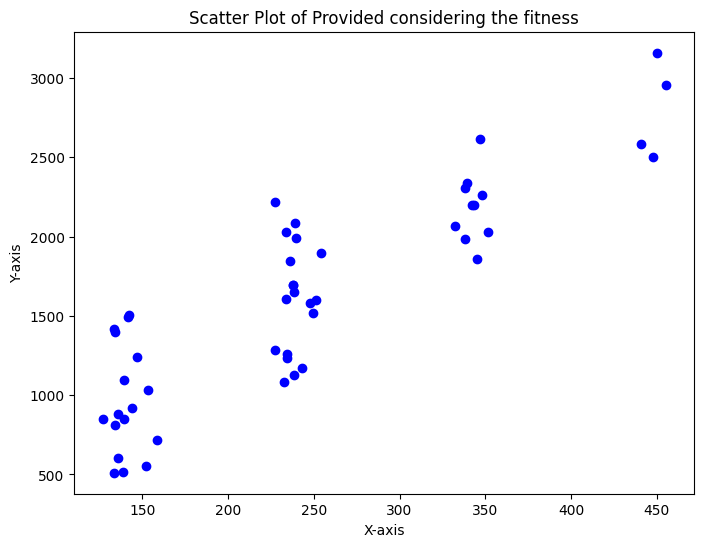

In [31]:
import matplotlib.pyplot as plt
x_values = [point[0] for point in timeconst]
y_values = [point[1] for point in timeconst]

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color='blue', marker='o')

# Labeling the axes
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot of Provided considering the fitness")

# Display the plot
plt.show()

In [32]:
print(orderdue[0])

15.0


In [33]:
from sklearn.cluster import KMeans

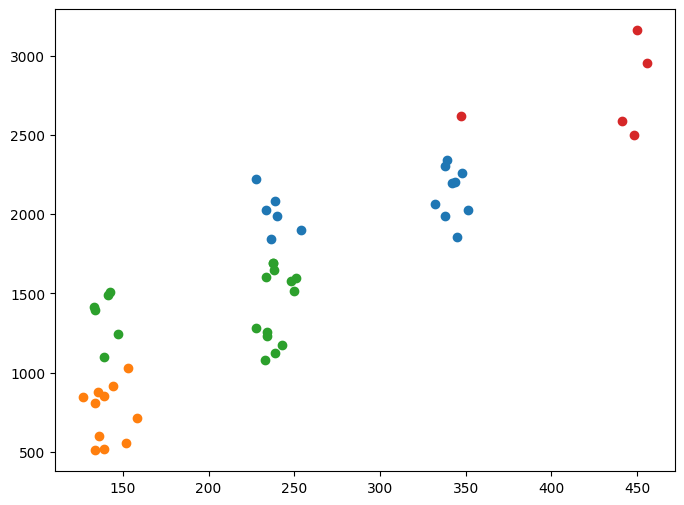

In [34]:
data = np.array(timeconst)

# Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data)

# Get the cluster labels for each data point
labels = kmeans.labels_



# Plot the clustered scatter plot
plt.figure(figsize=(8, 6))
for i in range(4):  # 4 clusters
    # Select points that belong to the current cluster
    cluster_points = data[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")

In [35]:
# prompt: retain the best schedule solutin here and assing it to best_solution variable

best_solution = None
min_makespan = float('inf')
min_lateness = float('inf')

for i in range(50):
  makespan, lateness = calculate_max_machine_time(initial_population[i], stime, prate, orderdue)
  if makespan < min_makespan:
    min_makespan = makespan
    min_lateness = lateness
    best_solution = initial_population[i]
  elif makespan == min_makespan and lateness < min_lateness:
    min_lateness = lateness
    best_solution = initial_population[i]

In [36]:
best_solution = None
min_makespan = float('inf')
min_lateness = float('inf')

for i in range(50):
  makespan, lateness = calculate_max_machine_time(initial_population[i], stime, prate, orderdue)
  if makespan < min_makespan:
    min_makespan = makespan
    min_lateness = lateness
    best_solution = initial_population[i]
  elif makespan == min_makespan and lateness < min_lateness:
    min_lateness = lateness
    best_solution = initial_population[i]

In [37]:
def calculate_fitness(chromosome, setup_time, processing_times, due_dates):
    machine_times = [0, 0, 0, 0]  # Track cumulative processing time for each machine
    lateness = 0

    # Decode chromosome and assign orders to machines
    for i in range(0, len(chromosome), 2):
        order = i // 2
        machine_code = chromosome[i] * 2 + chromosome[i + 1]
        machine = machine_code

        # Calculate the order's completion time on the assigned machine
        order_completion_time = machine_times[machine] + processing_times[order][machine]

        # Update the machine's cumulative processing time with this order's time
        machine_times[machine] = order_completion_time

        # Add setup time if not the last order
        if i < len(chromosome) - 2:
            next_order = (i // 2) + 1
            if setup_time[order][next_order] != 100:
                machine_times[machine]+= setup_time[order][next_order]
        lateness += max(0, order_completion_time - due_dates[order])

    # Fitness is the negative of (max completion time + lateness), minimizing both
    total_time = max(machine_times)  # Makespan: maximum time among machines
    fitness = -(total_time + lateness)
    return fitness

def tournament_selection(population, fitness_scores, k=3):
    selected = []
    for _ in range(len(population)):
        candidates = random.sample(range(len(population)), k)
        best = max(candidates, key=lambda x: fitness_scores[x])
        selected.append(population[best])
    return selected

# Step 4: Crossover (single-point crossover)
def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 2)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

# Step 5: Mutation (swap mutation for machine assignment)
def mutate(chromosome, mutation_rate=0.05):
    for i in range(0, len(chromosome), 2):
        if random.random() < mutation_rate:
            chromosome[i], chromosome[i + 1] = chromosome[i + 1], chromosome[i]
    return chromosome

In [38]:
def genetic_algorithm(setup_time, processing_times, due_dates, population, generations=100, pop_size=50, chrom_length=60):
    best_chromosome = None  # Initialize best_chromosome to store the best solution
    best_fitness = float('-inf')  # Initialize best_fitness to a very low value

    for generation in range(generations):
        # Calculate fitness for each chromosome
        fitness_scores = [calculate_fitness(chrom, setup_time, processing_times, due_dates) for chrom in population]

        # Find the best chromosome in the current generation
        current_best_fitness = max(fitness_scores)
        current_best_chromosome_index = fitness_scores.index(current_best_fitness)
        current_best_chromosome = population[current_best_chromosome_index]

        # Update best_chromosome and best_fitness if a better solution is found
        if current_best_fitness > best_fitness:
            best_fitness = current_best_fitness
            best_chromosome = current_best_chromosome

        # Select parents based on fitness
        selected_parents = tournament_selection(population, fitness_scores)

        # Create next generation using crossover and mutation
        next_generation = []
        while len(next_generation) < pop_size:
            parent1, parent2 = random.sample(selected_parents, 2)
            child1, child2 = crossover(parent1, parent2)
            next_generation.append(mutate(child1))
            next_generation.append(mutate(child2))

        # Replace old population with new generation
        population = next_generation

        # Track the best solution
        print(f"Generation {generation}: Best Fitness = {best_fitness}")

    print("\nBest Chromosome after 100 Generations:",best_chromosome)
    print("Fitness:", best_fitness)
    # Return the best chromosome from the final generation
    return best_chromosome, best_fitness

In [39]:
best_solution, best_fitness = genetic_algorithm(stime, prate, orderdue, initial_population)

Generation 0: Best Fitness = -77.56600000000003
Generation 1: Best Fitness = -77.56600000000003
Generation 2: Best Fitness = -77.56600000000003
Generation 3: Best Fitness = -77.56600000000003
Generation 4: Best Fitness = -77.52600000000001
Generation 5: Best Fitness = -65.662
Generation 6: Best Fitness = -65.662
Generation 7: Best Fitness = -65.662
Generation 8: Best Fitness = -65.662
Generation 9: Best Fitness = -65.662
Generation 10: Best Fitness = -65.662
Generation 11: Best Fitness = -65.662
Generation 12: Best Fitness = -65.662
Generation 13: Best Fitness = -65.662
Generation 14: Best Fitness = -65.662
Generation 15: Best Fitness = -65.662
Generation 16: Best Fitness = -65.662
Generation 17: Best Fitness = -65.662
Generation 18: Best Fitness = -65.662
Generation 19: Best Fitness = -65.662
Generation 20: Best Fitness = -65.662
Generation 21: Best Fitness = -65.662
Generation 22: Best Fitness = -65.662
Generation 23: Best Fitness = -65.662
Generation 24: Best Fitness = -65.662
Gener

In [40]:
import pandas as pd

# Example setup for demonstration
chromosome_length = 60  # Length of the chromosome
num_orders = chromosome_length // 2  # Each order corresponds to 2 bits
num_machines = 4  # Machines are indexed from 0 to 3

# Assuming real_solution holds the best chromosome (e.g., a list of 0s and 1s)
real_solution = best_solution  # Replace this with the actual best chromosome

# Decode the chromosome into order-machine assignments
orders = []
machines = []

for i in range(0, len(real_solution), 2):
    order = i // 2  # Calculate order index (each order takes 2 bits)
    machine_code = real_solution[i] * 2 + real_solution[i + 1]  # Decode machine (0-3)

    orders.append(order + 1)  # Adding 1 for a 1-based index
    machines.append(machine_code)  # Machine assignment

# Create a DataFrame for easy tabular display
table = pd.DataFrame({
    'Order': orders,
    'Assigned Machine': machines
})

print("Table of Assigned Machines and Orders:")
print(table)

Table of Assigned Machines and Orders:
    Order  Assigned Machine
0       1                 3
1       2                 0
2       3                 0
3       4                 2
4       5                 3
5       6                 0
6       7                 2
7       8                 2
8       9                 2
9      10                 1
10     11                 1
11     12                 1
12     13                 3
13     14                 0
14     15                 3
15     16                 0
16     17                 3
17     18                 1
18     19                 1
19     20                 3
20     21                 2
21     22                 2
22     23                 2
23     24                 2
24     25                 2
25     26                 3
26     27                 0
27     28                 0
28     29                 3
29     30                 3


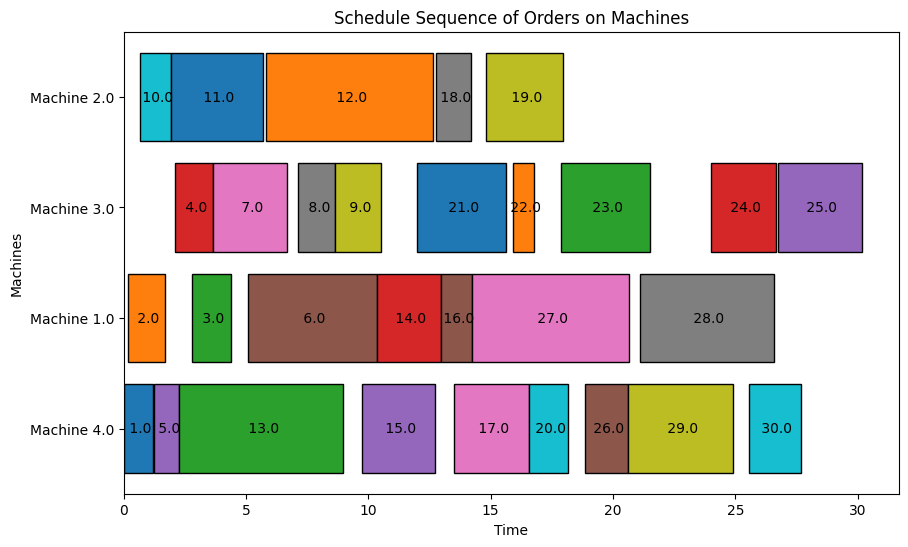

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

real_solution = best_solution
orders = []
machines = []
start_times = []
end_times = []
current_time_per_machine = [0] * 4

for i in range(0, len(real_solution), 2):
    order = i // 2
    machine_code = real_solution[i] * 2 + real_solution[i + 1]

    # Calculate start and end times for each order on the assigned machine
    start_time = current_time_per_machine[machine_code]
    process_time = prate[order][machine_code]

    # Update start time with setup time if it's not the first order on the machine
    if i > 0:
        prev_order = (i // 2) - 1
        # The original code used stime (entire setup time matrix) incorrectly
        # The current code should use the proper element from stime
        setup_time = stime[prev_order][order] if stime[prev_order][order] != 100 else 0
        start_time += setup_time # Fixed here: add setup_time to start_time

    end_time = start_time + process_time
    current_time_per_machine[machine_code] = end_time  # Update machine's end time

    # Append the schedule data for plotting
    orders.append(order + 1)
    machines.append(machine_code)
    start_times.append(start_time) # Appending the calculated start_time
    end_times.append(end_time) # Appending the calculated end_time

# Create a DataFrame for easy manipulation
schedule_df = pd.DataFrame({
    'Order': orders,
    'Machine': machines,
    'Start Time': start_times,
    'End Time': end_times
})

# Plotting the Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))

# Assign unique colors for each machine
colors = ['skyblue', 'salmon', 'lightgreen', 'orange']

for idx, row in schedule_df.iterrows():
    ax.barh(
        y=f"Machine {row['Machine']+1}",
        left=row['Start Time'],
        width=row['End Time'] - row['Start Time'],
        edgecolor='black'
    )
    ax.text(row['Start Time'] + (row['End Time'] - row['Start Time']) / 2,
            f"Machine {row['Machine']+1}",
            f" {row['Order']}", ha='center', va='center', color='black')

# Add labels and title
ax.set_xlabel("Time")
ax.set_ylabel("Machines")
ax.set_title("Schedule Sequence of Orders on Machines")
plt.show()

In [42]:
data = []
for i in range(30):
    for j in range(4):
        data.append({
            'Order': i+1,
            'Machine': j+1,
            'process time': prate[i][j]
        })

# Convert to DataFrame
df = pd.DataFrame(data)

# Pivot to get a tabular form with only setup times
df_pivot = df.pivot(index='Order', columns='Machine', values='process time')
df_pivot.columns.name = "Machine"  # Clean up column names

# Display the table
print(df_pivot)

Machine        1        2        3        4
Order                                      
1          1.538  100.000  100.000    1.194
2          1.500  100.000  100.000    0.789
3          1.607  100.000  100.000    0.818
4        100.000  100.000    1.564    2.143
5        100.000  100.000    0.736    1.017
6          5.263  100.000  100.000    3.200
7          4.865  100.000    3.025    3.214
8        100.000  100.000    1.500    1.440
9        100.000  100.000    1.869    2.459
10       100.000    1.282  100.000  100.000
11       100.000    3.750  100.000    3.000
12       100.000    6.796    7.000    5.600
13        11.250  100.000  100.000    6.716
14         2.632  100.000  100.000    1.527
15         5.000  100.000  100.000    2.985
16         1.250  100.000  100.000    0.783
17         4.474  100.000  100.000    3.036
18       100.000    1.429  100.000  100.000
19       100.000    3.130  100.000    2.687
20         2.424  100.000    1.074    1.600
21         7.317  100.000    3.6

In [43]:
prate


array([[  1.538, 100.   , 100.   ,   1.194],
       [  1.5  , 100.   , 100.   ,   0.789],
       [  1.607, 100.   , 100.   ,   0.818],
       [100.   , 100.   ,   1.564,   2.143],
       [100.   , 100.   ,   0.736,   1.017],
       [  5.263, 100.   , 100.   ,   3.2  ],
       [  4.865, 100.   ,   3.025,   3.214],
       [100.   , 100.   ,   1.5  ,   1.44 ],
       [100.   , 100.   ,   1.869,   2.459],
       [100.   ,   1.282, 100.   , 100.   ],
       [100.   ,   3.75 , 100.   ,   3.   ],
       [100.   ,   6.796,   7.   ,   5.6  ],
       [ 11.25 , 100.   , 100.   ,   6.716],
       [  2.632, 100.   , 100.   ,   1.527],
       [  5.   , 100.   , 100.   ,   2.985],
       [  1.25 , 100.   , 100.   ,   0.783],
       [  4.474, 100.   , 100.   ,   3.036],
       [100.   ,   1.429, 100.   , 100.   ],
       [100.   ,   3.13 , 100.   ,   2.687],
       [  2.424, 100.   ,   1.074,   1.6  ],
       [  7.317, 100.   ,   3.614, 100.   ],
       [100.   , 100.   ,   0.864, 100.   ],
       [10

In [44]:
stime[18][28]

100.0